In [1]:
# Importing necessary Python libraries
import pandas as pd
import numpy as np
from sjvisualizer import DataHandler, Canvas, BarRace, StaticImage
import re
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Reading in the excel file
tt = pd.read_excel("/Users/ibtassam/Downloads/tt_signupsheets.xlsx")
#tt.head() # The player data is separated by linebreaks "\n" within the same cell for each date.

In [3]:
# Change dates to consistent format
tt['Date'] = pd.to_datetime(tt['Date'])
# Split linebreaks within same cell into multiple columns
tt2 = tt.Players.str.split(pat="\n", expand=True)
# This part required the most trial and error to get the best possible regex pattern.
# This was due to names being in various formats, having only first name/first+last/first+middle+last name
# Most names started with numbers but one row did not. Some names had period or hyphen.
for i in range(0,16):
    tt2[i] = tt2[i].str.extract("([A-Za-z]+.\s*\w*)", expand=True)
# I tried many different regex patterns to conclude that this one captures the max criteria at this stage of cleaning.
#tt2.head()

In [4]:
# Compensating for 3 duplicate values that had same name
tt2[10]= tt2[10].replace({'Kashif Khalil':'Kashif Khalil son'})
tt2[8]= tt2[8].replace({'Kashif Khalil':'Kashif Khalil son'})
# Removing leading and trailing spaces using RegExp
tt2 = tt2.replace(r"^ +| +$", r"", regex=True)
# Capitalize the first letters of first name and last names only
# Used for loop as it was giving Type Error (due to non-str values) when applied on entire df.
for i in range(len(tt2.columns)):
    tt2[i] = tt2[i].str.title()

In [5]:
# Checking for duplicates/ name format inconsistencies that are still remaining.
#set(np.concatenate(tt2.values))

In [6]:
# Manual replacements for same person's names that were entered in various ways.
tt2 = tt2.replace(to_replace ='Adeel$', value = 'Adeel Fayyaz', regex = True)
tt2 = tt2.replace(to_replace ='Haseeb$', value = 'Haseeb Shahid', regex = True)
tt2 = tt2.replace(to_replace ='Imran$', value = 'Imran Khan', regex = True)
tt2 = tt2.replace(to_replace ='Khurram$', value = 'Khurram Tauheed', regex = True)
tt2 = tt2.replace(to_replace ='M.Salman$', value = 'Salman Inam', regex = True)
tt2 = tt2.replace(to_replace ='Salman Imam$', value = 'Salman Inam', regex = True)
tt2 = tt2.replace(to_replace ='M. Salman$', value = 'Salman Inam', regex = True)
tt2 = tt2.replace(to_replace ='Mohsin$', value = 'Mohsin Arshad', regex = True)
tt2 = tt2.replace(to_replace ='Moin$', value = 'Moin Khan', regex = True)
tt2 = tt2.replace(to_replace ='Moneeb$', value = 'Moneeb Shahid', regex = True)
tt2 = tt2.replace(to_replace ='Nabeel$', value = 'Nabeel Khalid', regex = True)
tt2 = tt2.replace(to_replace ='Nabeel-Paid$', value = 'Nabeel Khalid', regex = True)
tt2 = tt2.replace(to_replace ='^Nadeem$', value = 'Nadeem Noor', regex = True)
tt2 = tt2.replace(to_replace ='^Nadeem N$', value = 'Nadeem Noor', regex = True)
tt2 = tt2.replace(to_replace ='^\w*\,\sNadeem$', value = 'Nadeem Noor', regex = True)
tt2 = tt2.replace(to_replace ='Owais$', value = 'Owais Amin', regex = True)
tt2 = tt2.replace(to_replace ='Owais Ahme$', value = 'Owais Amin', regex = True)
tt2 = tt2.replace(to_replace ='\w*.M$', value = 'Sheikh Ali', regex = True)
tt2 = tt2.replace(to_replace ='^Sheikh Muhammad$', value = 'Sheikh Ali', regex = True)
tt2 = tt2.replace(to_replace ='Shoaib$', value = 'Shoaib Muhammad', regex = True)
tt2 = tt2.replace(to_replace ='Rizwan$', value = 'Rizwan Ahmed', regex = True)
tt2 = tt2.replace(to_replace ='Rizwan$', value = 'Rizwan Ahmed', regex = True)

In [7]:
# There are no more inconsistencies in the data.
df2cols = set(np.concatenate(tt2.values))
#df2cols

In [8]:
#tt2.stack().value_counts()

In [9]:
tt3 = pd.concat([tt,tt2], axis=1)
tt3 = tt3.drop('Players', axis=1)
#tt3.head()

In [10]:
# Creating new df that will allow me to add 1 for each date if a certain player played on that date.
df = pd.DataFrame(columns=set(np.concatenate(tt2.values)))
df2 = pd.concat([tt,df], axis=1)
df2 = df2.drop('Players', axis=1)
#df2 = df2[df2.columns.dropna()]
df2 = df2.fillna(0)
#df2.head(2)

In [11]:
#tt2.head(2)

In [12]:
# Using the newly created empty dataframe to add actual values from categorical table
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for index,row in tt3.iterrows():
    for col in cols:
        df2[row[col]][index] += 1
        
# df2['Date'] = tt3['Date']
# pd.DataFrame(df2)


/var/folders/mq/r9pnl_393nbdg6_073nlswd40000gn/T/ipykernel_37877/2563275795.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[row[col]][index] += 1


In [13]:
# Sort by ascending order of 'Date'
df2.sort_values(by='Date', ascending = True, inplace = True) 
# Only 'cumsum' on the columns that have number of games (i.e. exclude 'Date' column)
df2.loc[:, list(df2cols)] = df2.loc[:, list(df2cols)].cumsum() 
# Dropping 'NaN' column
df2 = df2.drop(np.nan, axis=1)
df2.tail()

/Users/ibtassam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


,Date,Ibtassam Rasheed,Fahad Farooq,Ghufran Khan,Rizwan Ahmed,Usman Nadeem,Irfan Ahmed,Moneeb Shahid,Ehsan,Mohsin Arshad,Zeeshan Ali,Umer Iqbal,Adeel Fayyaz,Adnan Ahmed,Moiz Dawar,Saqib Zaman,Taha R,Adnan Zeeshan,Syed Adnan,Masood Akhtar,Salman Inam,Muhammad Sultan,Fahad Tariq,Faaz Khan,Ali Dawood,Shazil,Shahzad Majid,Ghulam Mustafa,Shahzad,None,Mohammad Taha,Asim Akhtar,Babar Siddiqui,Moin Khan,Shehryar Aftab,Shoaib Muhammad,Naveed Iqbal,Bassam Khalil,Owais Amin,Shahid Rafiq,Hammad T,Arsalan Ahmed,Adnan,Usman Khan,Nabeel Khalid,Kashif Khalil Son,Kashif Channar,Syed Hamid,Sachal Afraz,Haseeb Shahid,Sumair Awan,Kashif Mughal,Nouman Javed,Shakeel Ahmed,Kamran Imam,Kashif Khalil,Sheikh Ali,Shahid,Imran Khan,Khurram Tauheed,Nadeem Noor
4,2022-12-09,39,2,12,0,1,46,21,1,0,1,1,7,1,1,0,1,2,1,2,16,8,1,2,0,1,4,28,0,0,1,1,1,23,1,2,1,3,3,1,1,2,1,2,17,3,7,36,1,47,1,1,1,24,2,10,7,1,4,4,19
3,2022-12-16,40,2,12,1,1,47,22,1,1,1,1,7,1,1,0,1,2,1,2,17,8,1,2,0,1,4,29,0,0,1,1,1,23,1,2,1,3,3,1,1,3,1,2,17,3,7,37,1,48,1,1,1,25,2,10,7,1,4,4,19
2,2022-12-23,41,2,12,2,1,48,23,1,2,1,1,7,1,1,0,1,2,1,2,18,8,1,2,0,1,4,30,0,0,1,1,1,23,1,2,1,3,3,1,1,3,1,2,17,3,7,37,1,49,1,1,1,26,2,10,7,1,4,4,19
1,2022-12-27,42,2,12,3,1,49,24,1,3,1,1,8,1,1,1,1,2,1,2,19,9,1,2,0,1,4,31,1,0,1,1,1,24,1,2,1,3,3,1,1,3,1,2,17,3,7,37,1,50,1,1,1,27,2,10,7,1,4,5,19
0,2022-12-30,43,2,12,4,1,50,25,1,4,1,1,9,1,1,1,1,2,1,2,19,10,1,2,1,1,4,31,1,0,1,1,1,24,1,2,1,3,3,1,1,3,1,2,17,3,7,38,1,51,1,1,1,27,2,10,7,1,4,6,19


In [14]:
df2.to_excel('/Users/ibtassam/Downloads/tt3.xlsx', index=False)

In [1]:
from sjvisualizer import DataHandler, Canvas, BarRace, StaticImage
EXCEL_FILE = "/Users/ibtassam/Downloads/tt3.xlsx"
FPS = 60
DURATION = 1

#load data into dataframe
df = DataHandler.DataHandler(excel_file = EXCEL_FILE, number_of_frames = FPS*DURATION*60).df

#create canvas
canvas = Canvas.canvas()

#add racing bar chart
bar_chart = BarRace.bar_race(df=df, canvas=canvas.canvas)
canvas.add_sub_plot(bar_chart)

# Adding a title

canvas.add_title("No. of games attended by table tennis players in 2022", color = (0,0,0))
canvas.add_sub_title("See the number change at end of each of the 53 TT events in 2022", color = (150,150,150))

# Adding time label
canvas.add_time(df=df, time_indicator = "month")

#canvas.add_logo(logo = "/Users/ibtassam/Downloads/visualpics/logo.png")
ex1 = StaticImage.static_image(canvas=canvas.canvas, file="/Users/ibtassam/Downloads/visualpics/logo.png", x_pos=2000, y_pos=25, width=150, height=150)
ex = StaticImage.static_image(canvas=canvas.canvas, file="/Users/ibtassam/Downloads/visualpics/ttlogo.png", x_pos=500, y_pos=25, width=150, height=150)
canvas.add_sub_plot(ex)
canvas.add_sub_plot(ex1)


#play the animation
canvas.play(fps=FPS)

Loading cashed data frame _pandas_cache/Users3600.xlsx
No image for Umer Iqbal
No image for Adnan Zeeshan
No image for Nouman Javed
No image for Naveed Iqbal
No image for Bassam Khalil
No image for Owais Amin
No image for Shoaib Muhammad
No image for Hammad T
No image for Arsalan Ahmed
No image for Adnan
No image for Usman Khan
No image for Shahid Rafiq
No image for Sachal Afraz
No image for Kashif Khalil Son
No image for Sumair Awan
No image for Kashif Mughal
No image for Kamran Imam
No image for Sheikh Ali
No image for Shahid
No image for Shehryar Aftab
No image for Asim Akhtar
No image for Babar Siddiqui
No image for Taha R
No image for Rizwan Ahmed
No image for Usman Nadeem
No image for Ehsan
No image for Mohsin Arshad
No image for Zeeshan Ali
No image for Adeel Fayyaz
No image for Adnan Ahmed
No image for Moiz Dawar
No image for Saqib Zaman
No image for Syed Adnan
No image for Fahad Farooq
No image for Masood Akhtar
No image for Muhammad Sultan
No image for Fahad Tariq
No image fo

1   HIToolbox                           0x00007ff819f16726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff819f162b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff819e85cd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff819f16173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff8133dd4b7 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff813232165 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   AppKit                              0x00007ff813c80a40 -[_NSFullScreenSpace(PresentationInstance) activateFullScreenPresentationOptions] + 207
8   AppKit                              0x00007ff813ad3848 -[_NSEnterFullScreenTransitionController _doSucceededToEnterFullScreen] + 721


FPS: 1
FPS: 23
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
F

FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60


FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60


FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60


FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 31
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 28
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60
FPS: 60


In [16]:
# # Importing Libraries
# import matplotlib.pyplot as plt
# from warnings import filterwarnings
# import csv
# import seaborn as sns


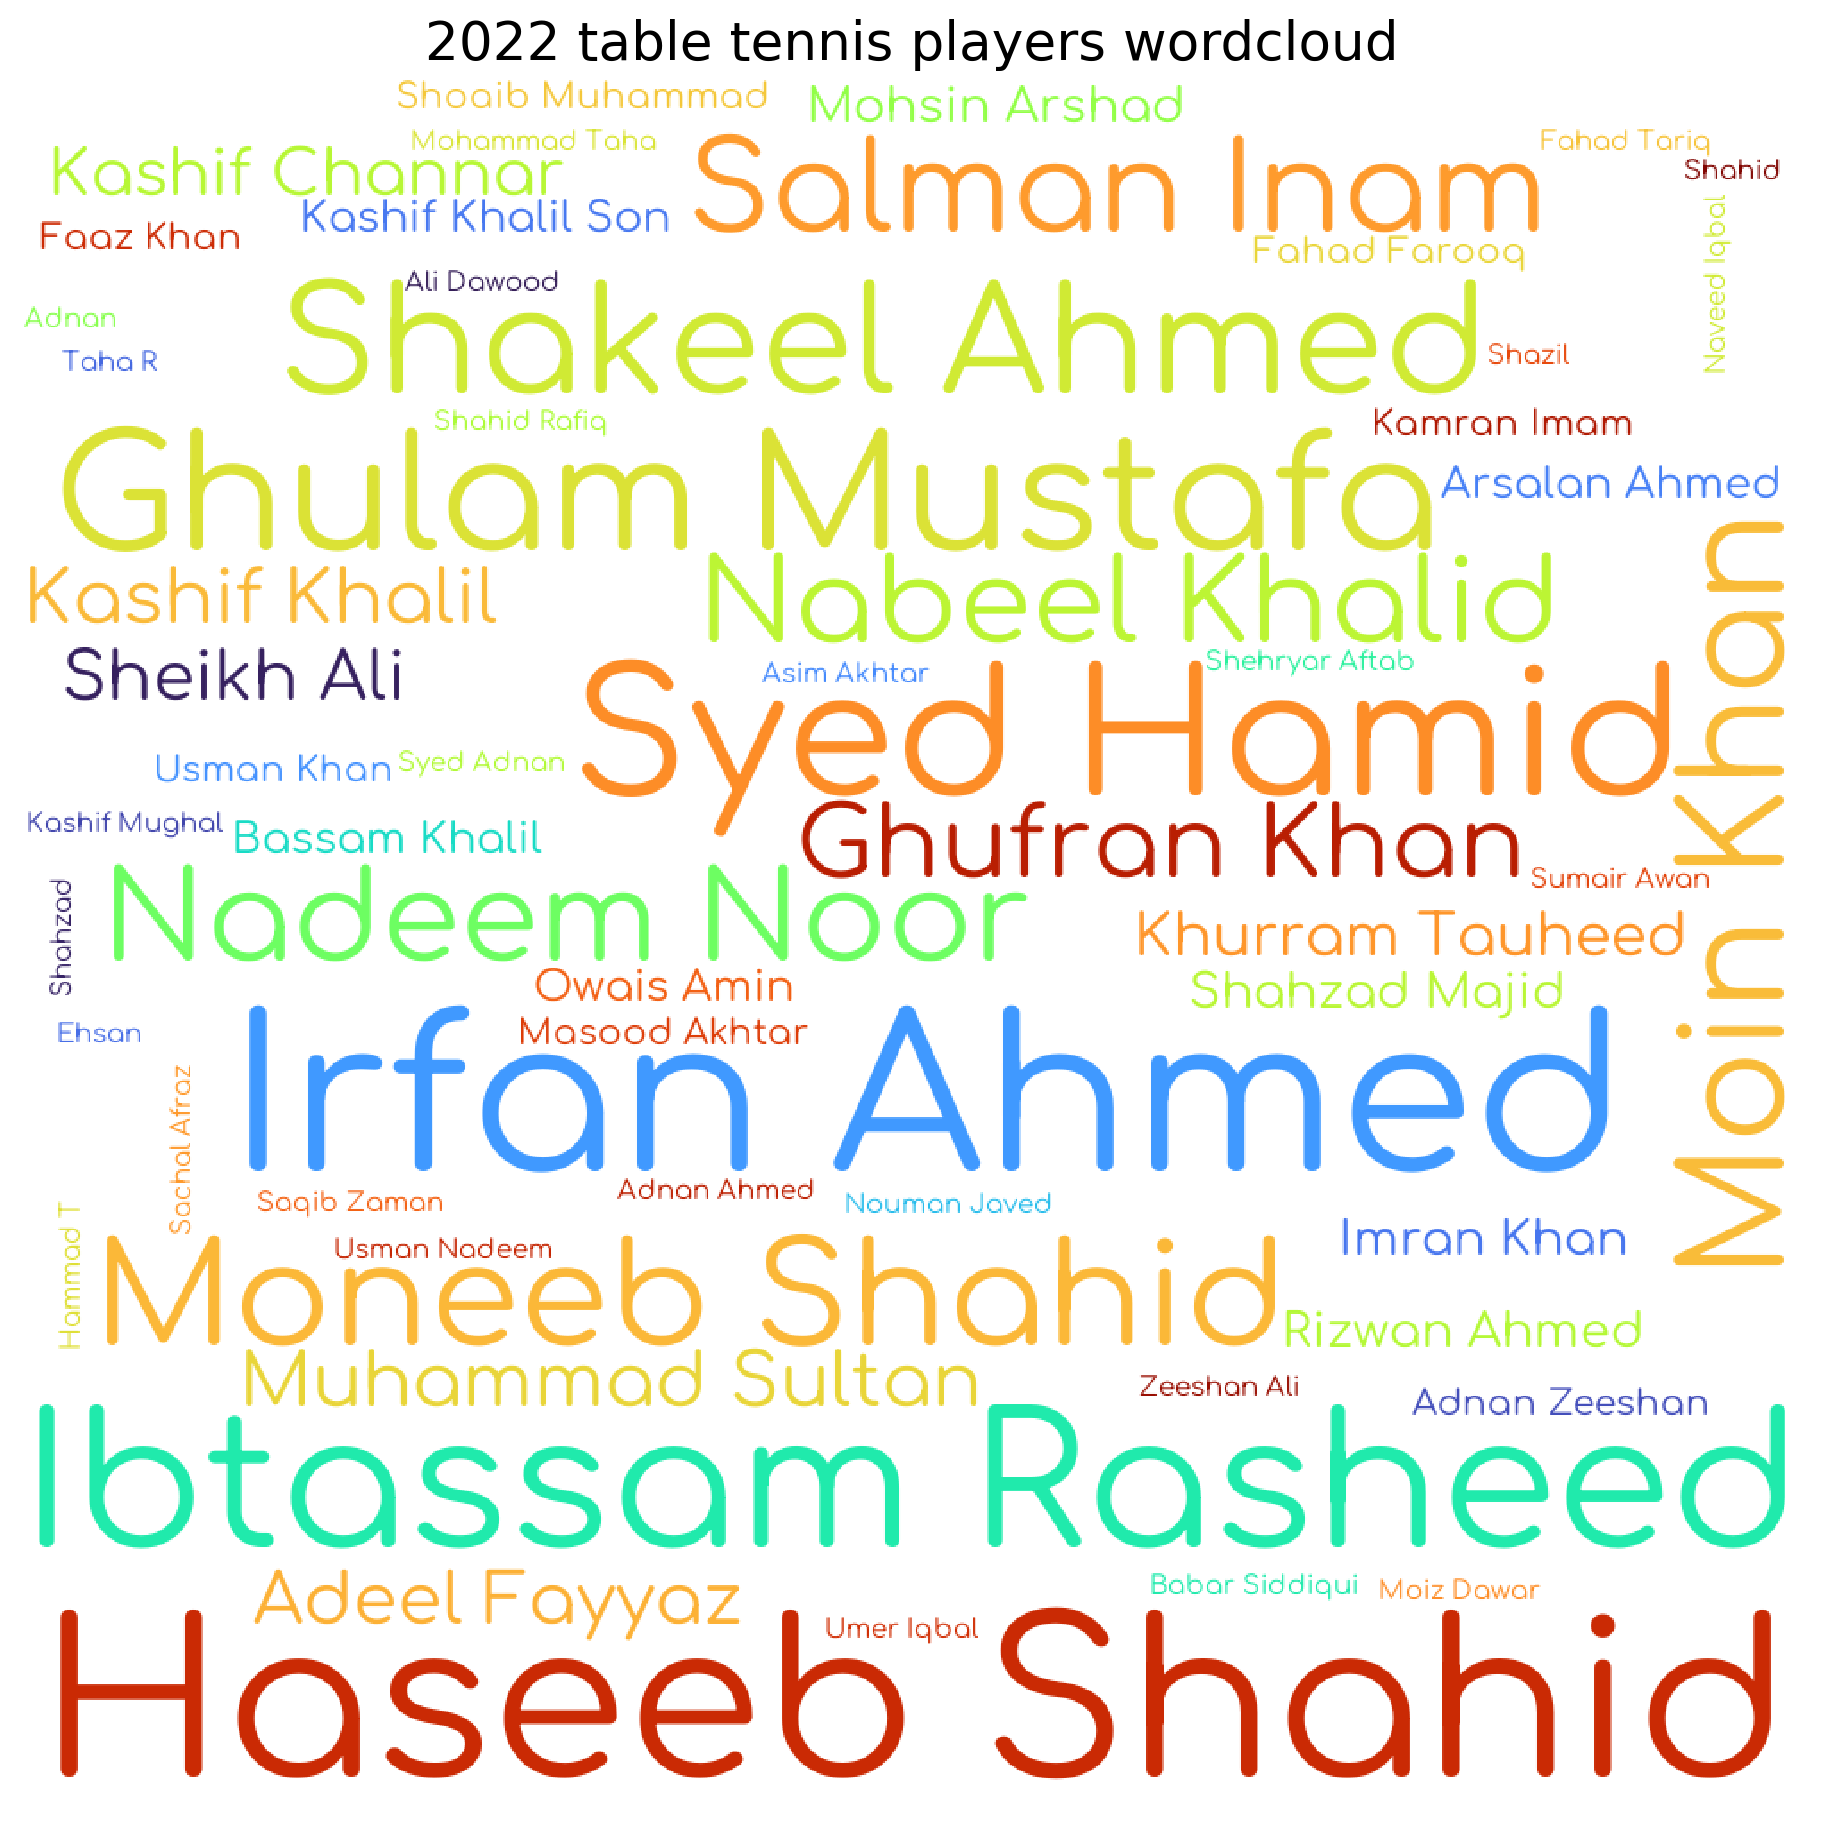

In [17]:
wordcloud = WordCloud(width=1000, height=1000,  min_word_length =3, background_color='white', mode='RGBA'
                     , font_path='/Users/ibtassam/Downloads/visualpics/font.ttf', colormap = 'turbo')

# generate the word cloud
wordcloud.generate_from_frequencies(tt2.stack().value_counts())

figure(figsize = (12,12), dpi = 192)

#plot
plt.tight_layout(pad=1)
plt.imshow(wordcloud, interpolation='nearest', aspect = 'auto')
plt.axis('off')
plt.title('2022 table tennis players wordcloud', fontdict = {'fontsize' : 20})
#wordcloud.to_file("wordcloud.png")
plt.show()

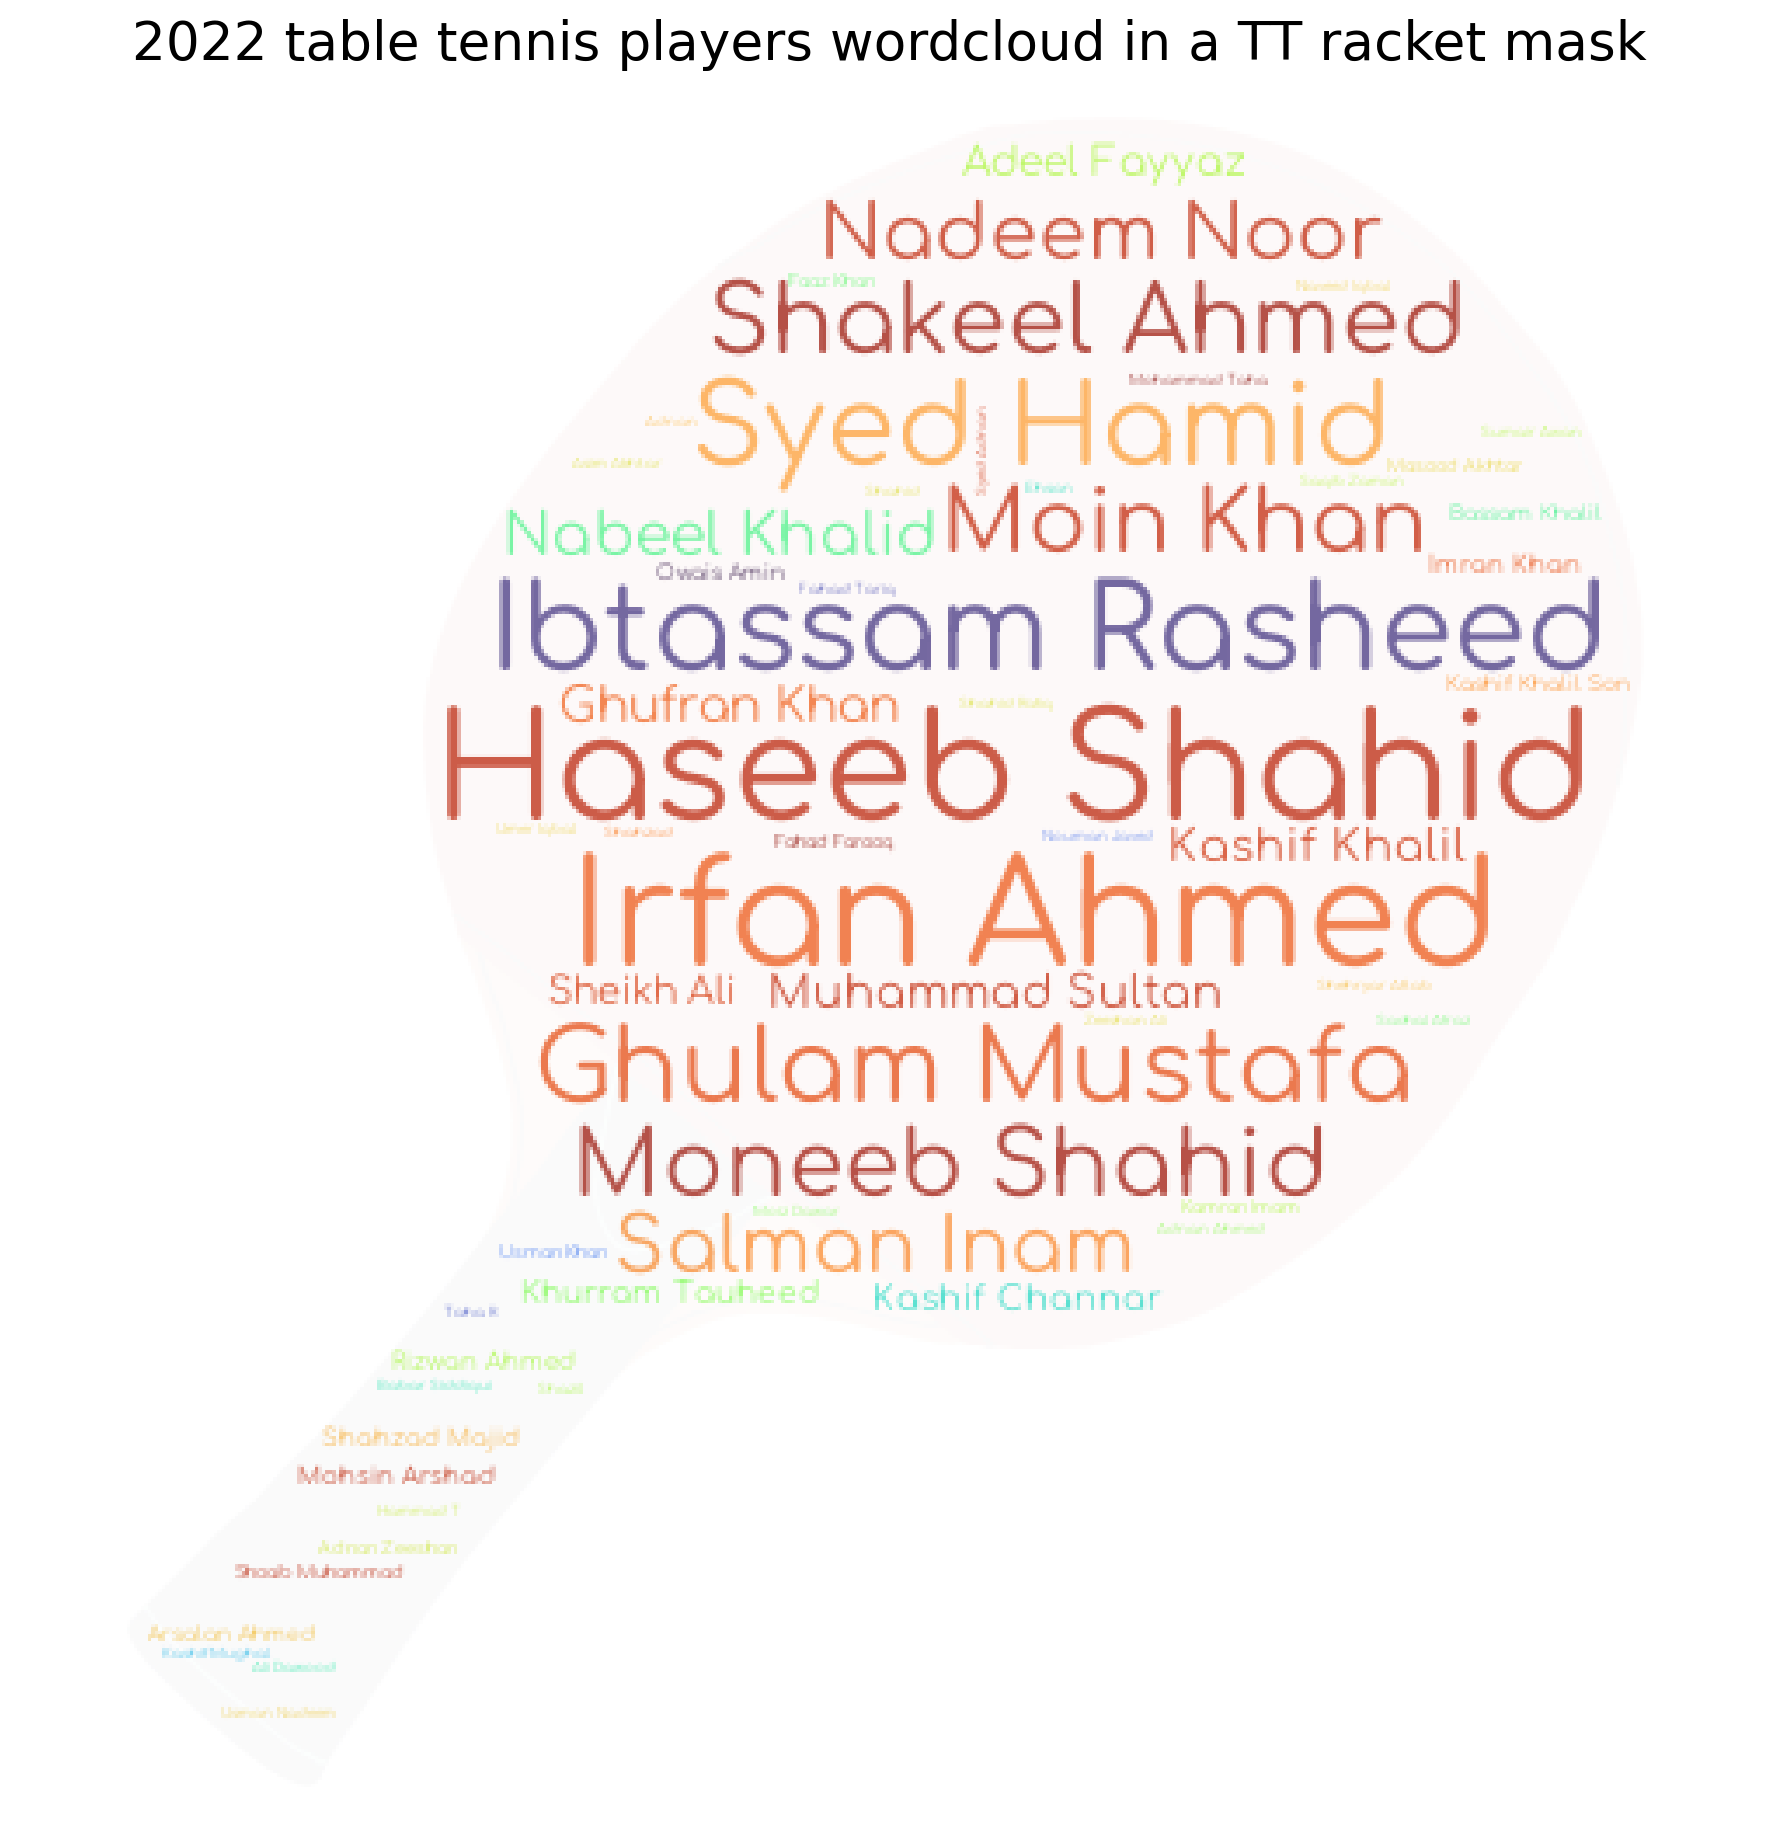

In [20]:
# use the downloaded mask
mask = np.array(Image.open("/Users/ibtassam/Downloads/visualpics/overlay.png"))

wordcloud = WordCloud(width=1000, height=1000,  min_word_length =3, background_color='white', mask=mask, mode='RGBA'
                     , font_path='/Users/ibtassam/Downloads/visualpics/font.ttf', colormap = 'turbo')

# generate the word cloud
wordcloud.generate_from_frequencies(tt2.stack().value_counts())
# make the words fit a mask
tt_img = Image.fromarray(wordcloud.to_array())
tt_mask_img = Image.fromarray(mask)
new_img = Image.blend(tt_img, 
                      tt_mask_img, 
                      0.3)

#plt.figure(figsize=(13,13),dpi=196)
figure(figsize = (12,12), dpi = 192)

#plot
plt.tight_layout(pad=1)
plt.imshow(new_img)
plt.axis('off')
plt.title('2022 table tennis players wordcloud in a TT racket mask', fontdict = {'fontsize' : 20})
#wordcloud.to_file("wordcloud.png")
plt.show()

### References

SJ visualizer information

Jose Palacios who helped with iterrows function.